## Import Library

In [1]:
import pandas as pd
pd.set_option("display.max_column", 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

import squarify
# Datetime module
from datetime import datetime, date, timedelta

In [2]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import  silhouette_score
from sklearn.cluster import KMeans

# General data description

In [3]:
#SaleOrder_data
SalesOrder_data = pd.read_csv("SalesOrder_data.csv")
SalesOrder_data

,Channel,SalesOrderLineKey,Sales Order,Sales Order Line
0,Reseller,43659001,SO43659,SO43659 - 1
1,Reseller,43659002,SO43659,SO43659 - 2
2,Reseller,43659003,SO43659,SO43659 - 3
3,Reseller,43659004,SO43659,SO43659 - 4
4,Reseller,43659005,SO43659,SO43659 - 5
...,...,...,...,...
121248,Internet,75122001,SO75122,SO75122 - 1
121249,Internet,75122002,SO75122,SO75122 - 2
121250,Internet,75123001,SO75123,SO75123 - 1
121251,Internet,75123002,SO75123,SO75123 - 2


In [4]:
#Sales Territory_data
SalesTerritory_data = pd.read_csv("SalesTerritory_data.csv")
SalesTerritory_data.head()

,SalesTerritoryKey,Region,Country,Group
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


In [5]:
#Reseller_data
Reseller_data = pd.read_csv('Reseller_data.csv')
Reseller_data

,ResellerKey,Reseller ID,Business Type,Reseller,City,State-Province,Country-Region,Postal Code
0,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable]
1,1,AW00000001,Value Added Reseller,A Bike Store,Seattle,Washington,United States,98104
2,2,AW00000002,Specialty Bike Shop,Progressive Sports,Renton,Washington,United States,98055
3,3,AW00000003,Warehouse,Advanced Bike Components,Irving,Texas,United States,75061
4,4,AW00000004,Value Added Reseller,Modular Cycle Systems,Austin,Texas,United States,78701
...,...,...,...,...,...,...,...,...
697,697,AW00000697,Value Added Reseller,Brakes and Gears,Tooele,Utah,United States,84074
698,698,AW00000698,Specialty Bike Shop,Western Bike Supplies,Cedar City,Utah,United States,84720
699,699,AW00000699,Warehouse,Sensational Discount Store,Kannapolis,North Carolina,United States,28081
700,700,AW00000700,Value Added Reseller,Underglaze and Finish Company,Charlotte,North Carolina,United States,28202


In [6]:
#Date_data
Date_data = pd.read_csv("Date_data.csv")
Date_data

,DateKey,Date,Fiscal Year,Fiscal Quarter,Month,Full Date,MonthKey
0,20170701,01/07/2017,FY2018,FY2018 Q1,2017 Jul,2017 Jul 01,201707
1,20170702,02/07/2017,FY2018,FY2018 Q1,2017 Jul,2017 Jul 02,201707
2,20170703,03/07/2017,FY2018,FY2018 Q1,2017 Jul,2017 Jul 03,201707
3,20170704,04/07/2017,FY2018,FY2018 Q1,2017 Jul,2017 Jul 04,201707
4,20170705,05/07/2017,FY2018,FY2018 Q1,2017 Jul,2017 Jul 05,201707
...,...,...,...,...,...,...,...
1456,20210626,26/06/2021,FY2021,FY2021 Q4,2021 Jun,2021 Jun 26,202106
1457,20210627,27/06/2021,FY2021,FY2021 Q4,2021 Jun,2021 Jun 27,202106
1458,20210628,28/06/2021,FY2021,FY2021 Q4,2021 Jun,2021 Jun 28,202106
1459,20210629,29/06/2021,FY2021,FY2021 Q4,2021 Jun,2021 Jun 29,202106


In [7]:
#Product_data
Product_data = pd.read_csv("Product_data.csv")
Product_data

,ProductKey,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category
0,210,FR-R92B-58,HL Road Frame - Black. 58,$868.63,Black,$1.431.50,HL Road Frame,Road Frames,Components
1,211,FR-R92R-58,HL Road Frame - Red. 58,$868.63,Red,$1.431.50,HL Road Frame,Road Frames,Components
2,212,HL-U509-R,Sport-100 Helmet. Red,$12.03,Red,$33.64,Sport-100,Helmets,Accessories
3,213,HL-U509-R,Sport-100 Helmet. Red,$13.88,Red,$33.64,Sport-100,Helmets,Accessories
4,214,HL-U509-R,Sport-100 Helmet. Red,$13.09,Red,$34.99,Sport-100,Helmets,Accessories
...,...,...,...,...,...,...,...,...,...
392,602,BB-8107,ML Bottom Bracket,$44.95,NaN,$101.24,ML Bottom Bracket,Bottom Brackets,Components
393,603,BB-9108,HL Bottom Bracket,$53.94,NaN,$121.49,HL Bottom Bracket,Bottom Brackets,Components
394,604,BK-R19B-44,Road-750 Black. 44,$343.65,Black,$539.99,Road-750,Road Bikes,Bikes
395,605,BK-R19B-48,Road-750 Black. 48,$343.65,Black,$539.99,Road-750,Road Bikes,Bikes


In [8]:
#Sales_data
Sales_data = pd.read_csv("Sales_data.csv")
Sales_data

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.99,2024.99,0.00%,1898.09,1898.09,2024.994
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.99,6074.98,0.00%,1898.09,5694.28,6074.982
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.99,2024.99,0.00%,1898.09,1898.09,2024.994
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.99,2039.99,0.00%,1912.15,1912.15,2039.994
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.99,2039.99,0.00%,1912.15,1912.15,2039.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121248,75122001,-1,15868,485,20200615,20200625,NaN,6,1,21.98,21.98,0.00%,8.22,8.22,21.980
121249,75122002,-1,15868,225,20200615,20200625,NaN,6,1,8.99,8.99,0.00%,6.92,6.92,8.990
121250,75123001,-1,18759,485,20200615,20200625,NaN,6,1,21.98,21.98,0.00%,8.22,8.22,21.980
121251,75123002,-1,18759,486,20200615,20200625,NaN,6,1,159.00,159.00,0.00%,59.47,59.47,159.000


In [9]:
#Customer_data
Customer_data = pd.read_csv("Customer_data.csv")
Customer_data

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code
0,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable]
1,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700
2,11001,AW00011001,Eugene Huang,Seaford,Victoria,Australia,3198
3,11002,AW00011002,Ruben Torres,Hobart,Tasmania,Australia,7001
4,11003,AW00011003,Christy Zhu,North Ryde,New South Wales,Australia,2113
...,...,...,...,...,...,...,...
18480,29479,AW00029479,Tommy Tang,Versailles,Yveline,France,78000
18481,29480,AW00029480,Nina Raji,London,England,United Kingdom,SW19 3RU
18482,29481,AW00029481,Ivan Suri,Hof,Bayern,Germany,95010
18483,29482,AW00029482,Clayton Zhang,Saint Ouen,Charente-Maritime,France,17490


# CHAPTER 3

## 1. Import Salesdata

In [10]:
# Dataset = Sales_data.csv

df = pd.read_csv("Sales_data.csv")
df

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.99,2024.99,0.00%,1898.09,1898.09,2024.994
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.99,6074.98,0.00%,1898.09,5694.28,6074.982
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.99,2024.99,0.00%,1898.09,1898.09,2024.994
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.99,2039.99,0.00%,1912.15,1912.15,2039.994
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.99,2039.99,0.00%,1912.15,1912.15,2039.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121248,75122001,-1,15868,485,20200615,20200625,NaN,6,1,21.98,21.98,0.00%,8.22,8.22,21.980
121249,75122002,-1,15868,225,20200615,20200625,NaN,6,1,8.99,8.99,0.00%,6.92,6.92,8.990
121250,75123001,-1,18759,485,20200615,20200625,NaN,6,1,21.98,21.98,0.00%,8.22,8.22,21.980
121251,75123002,-1,18759,486,20200615,20200625,NaN,6,1,159.00,159.00,0.00%,59.47,59.47,159.000


# 2. Data cleaning 


In [11]:
# Get the list of columns
df.columns

Index(['SalesOrderLineKey', 'ResellerKey', 'CustomerKey', 'ProductKey',
       'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'SalesTerritoryKey',
       'Order Quantity', 'Unit Price', 'Extended Amount',
       'Unit Price Discount Pct', 'Product Standard Cost',
       'Total Product Cost', 'Sales Amount'],
      dtype='object')

In [12]:
# Drop unnecessary columns
df = df[['CustomerKey','OrderDateKey', 'Sales Amount']].copy()
df

,CustomerKey,OrderDateKey,Sales Amount
0,-1,20170702,2024.994
1,-1,20170702,6074.982
2,-1,20170702,2024.994
3,-1,20170702,2039.994
4,-1,20170702,2039.994
...,...,...,...
121248,15868,20200615,21.980
121249,15868,20200615,8.990
121250,18759,20200615,21.980
121251,18759,20200615,159.000


In [13]:
SalesOrder_data1 = SalesOrder_data[['Sales Order']]
customerkey = df[['CustomerKey']]
SalesOrder_data1 = pd.concat([customerkey, SalesOrder_data1], axis=1)
SalesOrder_data1

,CustomerKey,Sales Order
0,-1,SO43659
1,-1,SO43659
2,-1,SO43659
3,-1,SO43659
4,-1,SO43659
...,...,...
121248,15868,SO75122
121249,15868,SO75122
121250,18759,SO75123
121251,18759,SO75123


In [14]:
SalesOrder_data1 = SalesOrder_data[['Sales Order']]
customerkey = df[['CustomerKey']]
customerkey = customerkey.astype(int)  # Chuyển đổi kiểu dữ liệu thành số nguyên
SalesOrder_data2 = pd.concat([SalesOrder_data1, customerkey], axis=1)
SalesOrder_data2 = SalesOrder_data2[['CustomerKey', 'Sales Order']]
SalesOrder_data2

,CustomerKey,Sales Order
0,-1,SO43659
1,-1,SO43659
2,-1,SO43659
3,-1,SO43659
4,-1,SO43659
...,...,...
121248,15868,SO75122
121249,15868,SO75122
121250,18759,SO75123
121251,18759,SO75123


In [15]:
#Geography
#Read Customer_data
df1 = pd.read_csv('Customer_data.csv')
df1 = df1[['CustomerKey', 'Country-Region']].copy()
df1

,CustomerKey,Country-Region
0,-1,[Not Applicable]
1,11000,Australia
2,11001,Australia
3,11002,Australia
4,11003,Australia
...,...,...
18480,29479,France
18481,29480,United Kingdom
18482,29481,Germany
18483,29482,France


In [16]:
df1 = df1[df1['CustomerKey'] > 0]
df1

,CustomerKey,Country-Region
1,11000,Australia
2,11001,Australia
3,11002,Australia
4,11003,Australia
5,11004,Australia
...,...,...
18480,29479,France
18481,29480,United Kingdom
18482,29481,Germany
18483,29482,France


In [17]:
#Rename 
df1 = df1.rename(columns={'CustomerKey': 'customer_key', 'Country-Region': 'country'}).copy()
df1

,customer_key,country
1,11000,Australia
2,11001,Australia
3,11002,Australia
4,11003,Australia
5,11004,Australia
...,...,...
18480,29479,France
18481,29480,United Kingdom
18482,29481,Germany
18483,29482,France


In [18]:
#Combine
df = pd.concat([df, SalesOrder_data1], axis = 1)
df = df[['CustomerKey','OrderDateKey', 'Sales Order', 'Sales Amount' ]]
df

,CustomerKey,OrderDateKey,Sales Order,Sales Amount
0,-1,20170702,SO43659,2024.994
1,-1,20170702,SO43659,6074.982
2,-1,20170702,SO43659,2024.994
3,-1,20170702,SO43659,2039.994
4,-1,20170702,SO43659,2039.994
...,...,...,...,...
121248,15868,20200615,SO75122,21.980
121249,15868,20200615,SO75122,8.990
121250,18759,20200615,SO75123,21.980
121251,18759,20200615,SO75123,159.000


In [19]:
#Remove the reseller values
df = df[df['CustomerKey'] > 0]
df

,CustomerKey,OrderDateKey,Sales Order,Sales Amount
60855,21768,20170701,SO43697,3578.2700
60856,28389,20170701,SO43698,3399.9900
60857,25863,20170701,SO43699,3399.9900
60858,14501,20170701,SO43700,699.0982
60859,11003,20170701,SO43701,3399.9900
...,...,...,...,...
121248,15868,20200615,SO75122,21.9800
121249,15868,20200615,SO75122,8.9900
121250,18759,20200615,SO75123,21.9800
121251,18759,20200615,SO75123,159.0000


In [20]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60398 entries, 60855 to 121252
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerKey   60398 non-null  int64  
 1   OrderDateKey  60398 non-null  int64  
 2   Sales Order   60398 non-null  object 
 3   Sales Amount  60398 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [21]:
# Change OrderDate column dtype to datetime
df.loc[:, 'OrderDateKey'] = pd.to_datetime(df['OrderDateKey'], format="%Y%m%d")

# check the data info again
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60398 entries, 60855 to 121252
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerKey   60398 non-null  int64         
 1   OrderDateKey  60398 non-null  datetime64[ns]
 2   Sales Order   60398 non-null  object        
 3   Sales Amount  60398 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [22]:
# Checking if the OrderDate column data match the format by returning the min and max of day/month/year

# Check the day column
day_date = df['OrderDateKey'].dt.day
print("day_min: %i" %day_date.min())
print("day_max: %i \n" %day_date.max())

# Check the month column
month_date = df['OrderDateKey'].dt.month
print("month_min: %i" %month_date.min())
print("month_max: %i \n" %month_date.max())

# Check the month column
year_date = df['OrderDateKey'].dt.year
print("year_min: %i" %year_date.min())
print("year_max: %i \n" %year_date.max())

day_min: 1
day_max: 31 

month_min: 1
month_max: 12 

year_min: 2017
year_max: 2020 



In [23]:
# Change column name
df = df.rename(columns={'CustomerKey': 'customer_key', 'OrderDateKey': 'order_date', 'Sales Amount': 'sales_amount', 'Sales Order': 'sales_order_number'}).copy()
df

,customer_key,order_date,sales_order_number,sales_amount
60855,21768,2017-07-01,SO43697,3578.2700
60856,28389,2017-07-01,SO43698,3399.9900
60857,25863,2017-07-01,SO43699,3399.9900
60858,14501,2017-07-01,SO43700,699.0982
60859,11003,2017-07-01,SO43701,3399.9900
...,...,...,...,...
121248,15868,2020-06-15,SO75122,21.9800
121249,15868,2020-06-15,SO75122,8.9900
121250,18759,2020-06-15,SO75123,21.9800
121251,18759,2020-06-15,SO75123,159.0000


In [24]:
# Check point
df_copy = df.copy()
# df = df_copy

# 3. Descriptive Analysis 


In [25]:
df = df.groupby(['customer_key','sales_order_number','order_date']).sales_amount.sum()
df.head()

customer_key  sales_order_number  order_date
11000         SO43793             2017-07-12    3399.99
              SO51522             2019-06-21    2341.97
              SO57418             2019-10-04    2507.03
11001         SO43767             2017-07-09    3374.99
              SO51493             2019-06-19    2419.93
Name: sales_amount, dtype: float64

In [26]:
df = df.reset_index()
df.head()

,customer_key,sales_order_number,order_date,sales_amount
0,11000,SO43793,2017-07-12,3399.99
1,11000,SO51522,2019-06-21,2341.97
2,11000,SO57418,2019-10-04,2507.03
3,11001,SO43767,2017-07-09,3374.99
4,11001,SO51493,2019-06-19,2419.93


In [27]:
df.describe()

,customer_key,order_date,sales_amount
count,27659.000000,27659,27659.000000
mean,18845.782530,2019-09-15 05:45:01.138869760,1061.451145
min,11000.000000,2017-07-01 00:00:00,2.290000
25%,13968.000000,2019-07-20 00:00:00,46.470000
50%,18096.000000,2019-11-19 00:00:00,594.970000
75%,23534.500000,2020-03-08 00:00:00,2181.562500
max,29483.000000,2020-06-15 00:00:00,3578.270000
std,5486.239775,NaN,1149.026001


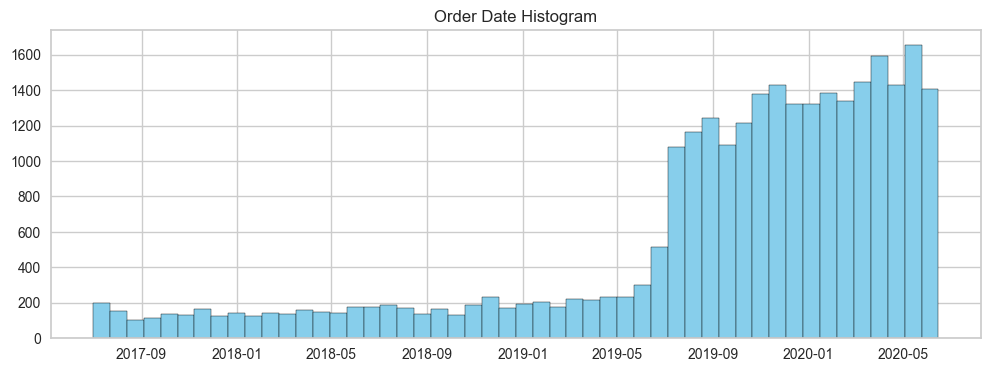

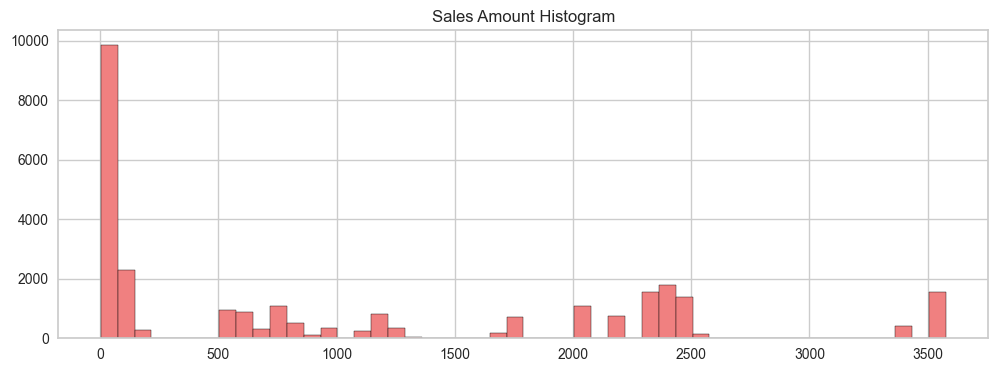

In [28]:
#order_date
plt.figure(figsize=(12, 4))
plt.hist(df['order_date'], bins=50, color='skyblue', edgecolor='black')
plt.title('Order Date Histogram')
plt.show()

#sales_amount
plt.figure(figsize=(12, 4))
plt.hist(df['sales_amount'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Sales Amount Histogram')

plt.show()

In [29]:
df_g = df[['customer_key', 'sales_amount']].copy()
df_g

,customer_key,sales_amount
0,11000,3399.9900
1,11000,2341.9700
2,11000,2507.0300
3,11001,3374.9900
4,11001,2419.9300
...,...,...
27654,29479,2049.0982
27655,29480,2442.0300
27656,29481,3374.9900
27657,29482,2049.0982


In [30]:
df1

,customer_key,country
1,11000,Australia
2,11001,Australia
3,11002,Australia
4,11003,Australia
5,11004,Australia
...,...,...
18480,29479,France
18481,29480,United Kingdom
18482,29481,Germany
18483,29482,France


In [31]:
sales_mount = df_g.groupby('customer_key').sales_amount.sum().reset_index()
sales_mount

,customer_key,sales_amount
0,11000,8248.9900
1,11001,6383.8800
2,11002,8114.0400
3,11003,8139.2900
4,11004,8196.0100
...,...,...
18479,29479,2049.0982
18480,29480,2442.0300
18481,29481,3374.9900
18482,29482,2049.0982


In [32]:
geography = df1.merge(df_g[['customer_key', 'sales_amount']], on='customer_key', how='inner')
geography.head()

,customer_key,country,sales_amount
0,11000,Australia,3399.99
1,11000,Australia,2341.97
2,11000,Australia,2507.03
3,11001,Australia,3374.99
4,11001,Australia,2419.93


In [33]:
sum_geography = geography.groupby('country').sales_amount.sum().reset_index()
sum_geography['sum_sales_of_country']=sum_geography['sales_amount'].astype(int)
sum_geography.drop('sales_amount', axis='columns', inplace=True)
sum_geography

,country,sum_sales_of_country
0,Australia,9061000
1,Canada,1977844
2,France,2644017
3,Germany,2894312
4,United Kingdom,3391712
5,United States,9389789


In [34]:
sum_geography.describe().astype(int)

,sum_sales_of_country
count,6
mean,4893112
std,3388156
min,1977844
25%,2706590
50%,3143012
75%,7643678
max,9389789


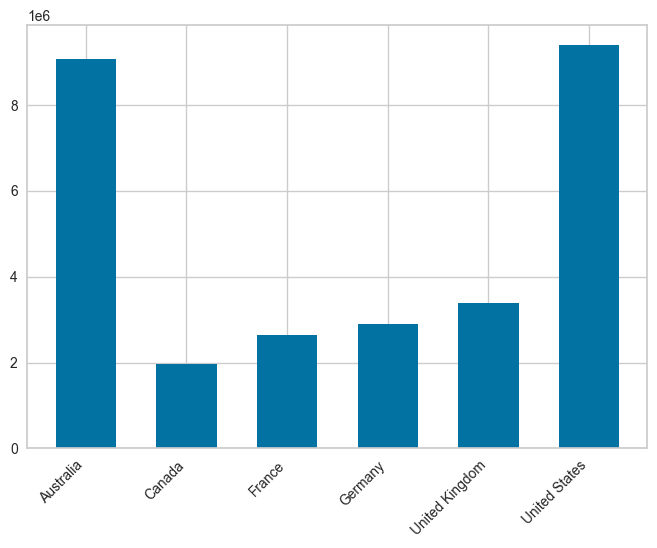

In [35]:
#Chart
x = sum_geography['country']
y = sum_geography['sum_sales_of_country'].astype(float)
plt.bar(x,y, width = 0.6)
plt.xticks(rotation=45, ha="right")
plt.show()

# 4. RFM values


In [36]:
# Recency Table

# I decided to add 1 day to prevent ambigous analysis/calculation in further step
# example = df.recency.min() = 0 will become 1

daydiff = (df.order_date.max()) - df.groupby('customer_key').order_date.max()
recency = daydiff.dt.days
recency = recency.reset_index()
recency = pd.DataFrame(recency)

recency = recency.rename(columns={'order_date':'recency'})
recency

,customer_key,recency
0,11000,255
1,11001,34
2,11002,324
3,11003,248
4,11004,257
...,...,...
18479,29479,496
18480,29480,180
18481,29481,884
18482,29482,482


In [37]:
# Frequency Table

freq = df.groupby('customer_key').sales_order_number.count().reset_index()
freq = freq.rename(columns = {'sales_order_number':'frequency'})
freq


,customer_key,frequency
0,11000,3
1,11001,3
2,11002,3
3,11003,3
4,11004,3
...,...,...
18479,29479,1
18480,29480,1
18481,29481,1
18482,29482,1


In [38]:
# Monetary Table

monetary = df.groupby('customer_key').sales_amount.sum().reset_index()
monetary = monetary.rename(columns = {'sales_amount':'monetary'})
monetary

,customer_key,monetary
0,11000,8248.9900
1,11001,6383.8800
2,11002,8114.0400
3,11003,8139.2900
4,11004,8196.0100
...,...,...
18479,29479,2049.0982
18480,29480,2442.0300
18481,29481,3374.9900
18482,29482,2049.0982


In [39]:
# Merge R, F, M Table into 1 DataFrame

rfm = pd.merge(recency, freq, on = 'customer_key',how = 'inner')
rfm = pd.merge(rfm, monetary, on = 'customer_key',how = 'inner')
rfm

,customer_key,recency,frequency,monetary
0,11000,255,3,8248.9900
1,11001,34,3,6383.8800
2,11002,324,3,8114.0400
3,11003,248,3,8139.2900
4,11004,257,3,8196.0100
...,...,...,...,...
18479,29479,496,1,2049.0982
18480,29480,180,1,2442.0300
18481,29481,884,1,3374.9900
18482,29482,482,1,2049.0982


In [40]:
concat_df_describe = pd.concat([rfm.describe(), sum_geography.describe().astype(int)], axis=1)
concat_df_describe['geography']=concat_df_describe['sum_sales_of_country']
concat_df_describe.drop('sum_sales_of_country', axis='columns', inplace=True)
concat_df_describe

,customer_key,recency,frequency,monetary,geography
count,18484.000000,18484.000000,18484.000000,18484.000000,6
mean,20241.500000,174.667983,1.496375,1588.329216,4893112
std,5336.015523,145.644062,1.101139,2124.231717,3388156
min,11000.000000,0.000000,1.000000,2.290000,1977844
25%,15620.750000,71.000000,1.000000,49.970000,2706590
50%,20241.500000,153.000000,1.000000,270.265000,3143012
75%,24862.250000,248.000000,2.000000,2511.275000,7643678
max,29483.000000,1080.000000,28.000000,13295.380000,9389789


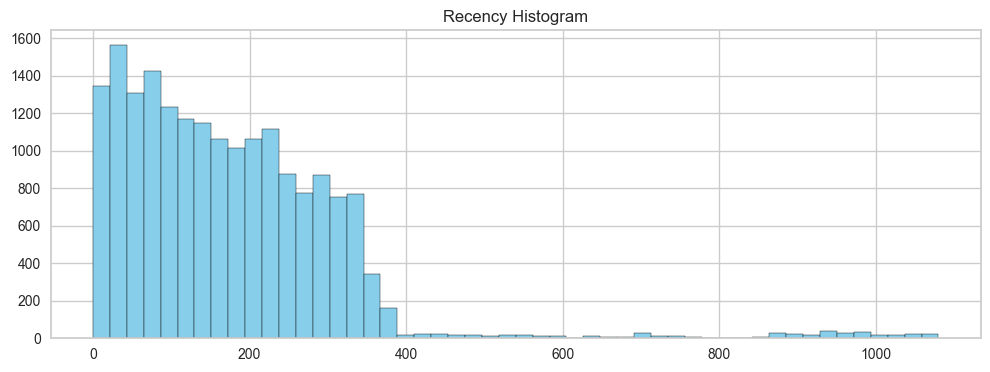

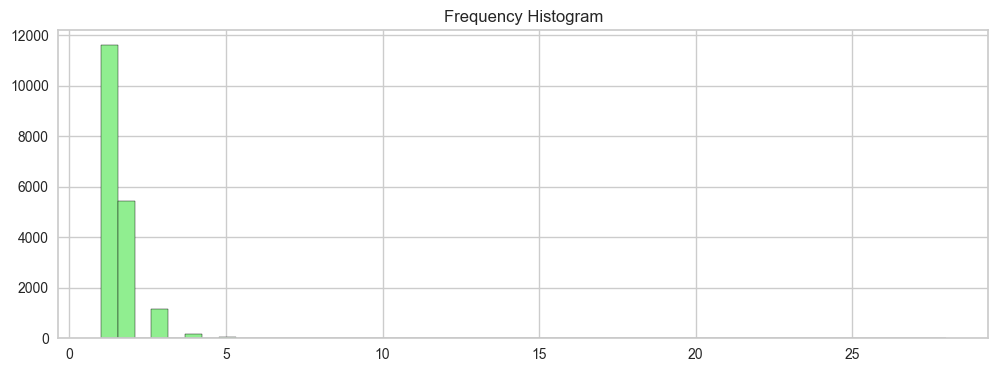

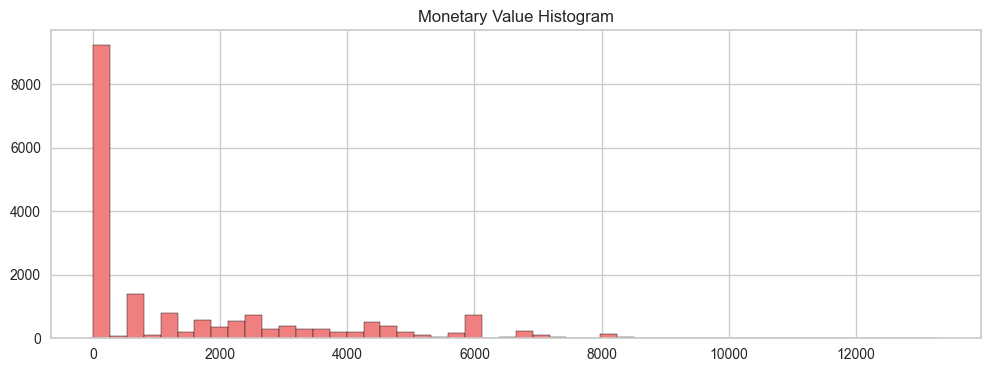

In [41]:
plt.figure(figsize=(12, 4))
plt.hist(rfm['recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Histogram')
plt.show()

plt.figure(figsize=(12, 4))
plt.hist(rfm['frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Histogram')
plt.show()

plt.figure(figsize=(12, 4))
plt.hist(rfm['monetary'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Monetary Value Histogram')

plt.show()


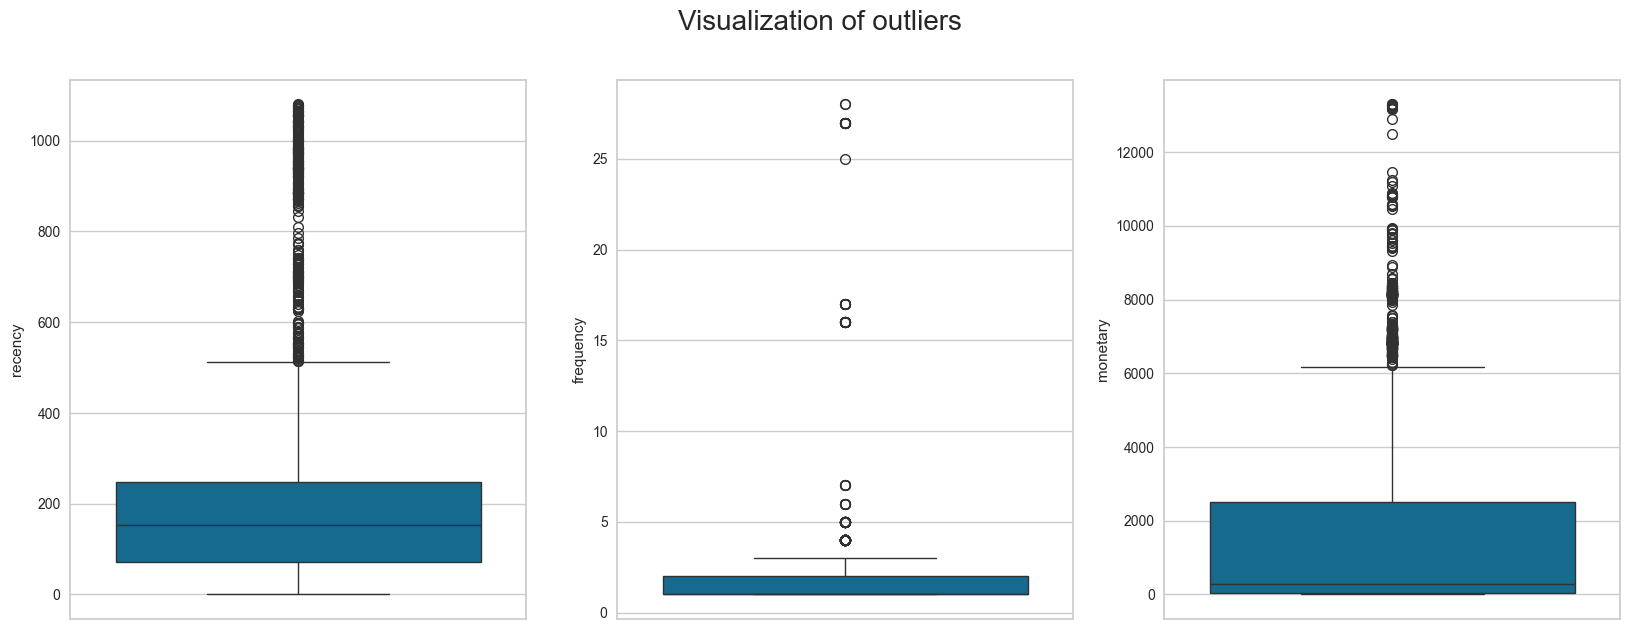

In [42]:
fig = plt.figure(figsize = (20,7))
fig.suptitle("Visualization of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=rfm,y="recency")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=rfm,y="frequency")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=rfm,y="monetary")

plt.show()

In [43]:
#Outlier values
def find_outliers(data_column):
    q1 = data_column.quantile(0.25)
    q3 = data_column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data_column < lower_bound) | (data_column > upper_bound)
    return outliers

In [44]:
recency_outliers = find_outliers(rfm['recency'])
frequency_outliers = find_outliers(rfm['frequency'])
monetary_outliers = find_outliers(rfm['monetary'])

In [45]:
print("Recency Outliers:")
print(rfm[recency_outliers].drop(['frequency', 'monetary'], axis=1).copy())

print("\nFrequency Outliers:")
print(rfm[frequency_outliers].drop(['recency', 'monetary'], axis=1).copy())

print("\nMonetary Outliers:")
print(rfm[monetary_outliers].drop(['recency', 'frequency'], axis=1).copy())

Recency Outliers:
       customer_key  recency
8802          19802     1065
9075          20075      773
11971         22971      919
11975         22975      922
12566         23566      832
...             ...      ...
18467         29467      954
18474         29474      939
18475         29475      929
18476         29476      907
18481         29481      884

[394 rows x 2 columns]

Frequency Outliers:
      customer_key  frequency
19           11019         17
78           11078         17
91           11091         28
131          11131          5
142          11142         17
...            ...        ...
4761         15761          4
4826         15826          4
5358         16358          4
5497         16497          4
5667         16667          4

[245 rows x 2 columns]

Monetary Outliers:
      customer_key   monetary
0            11000  8248.9900
1            11001  6383.8800
2            11002  8114.0400
3            11003  8139.2900
4            11004  8196.0100
...  

# 5. Transformation

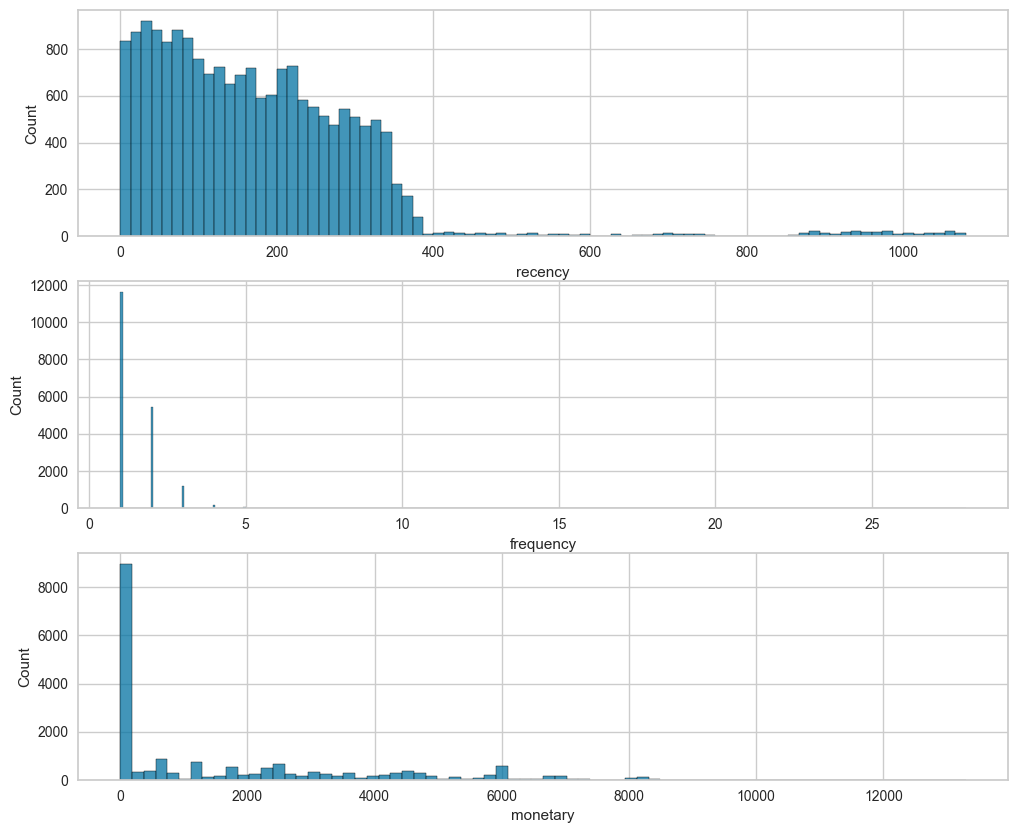

In [46]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(rfm['recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(rfm['frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(rfm['monetary'])

plt.show()


In [47]:
rfm.recency = rfm.recency.apply(lambda x: x+1)

In [48]:
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Cube root transformation
    data_cbrt=np.cbrt(rfm[x])
    z_score_data = (data_cbrt - data_cbrt.mean()) / data_cbrt.std()
    sns.histplot( z_score_data, ax=ax[0, 0])
    ax[0, 0].set_title(f'Cube Root Transformation: {round(data_cbrt.skew(), 2)}')

    # Log transformation
    data_log=np.log(rfm[x])
    z_score_data = (data_log - data_log.mean()) / data_log.std()
    sns.histplot(z_score_data, ax=ax[0, 1])
    ax[0, 1].set_title(f'Log Transformation: {round(data_log.skew(), 2)}')

    # Square root transformation
    data_sqrt=np.sqrt(rfm[x])
    z_score_data = (data_sqrt - data_sqrt.mean()) / data_sqrt.std()
    sns.histplot(z_score_data, ax=ax[1, 0])
    ax[1, 0].set_title(f'Square Root Transformation: {round(data_sqrt.skew(), 2)}')
   
    # Box-Cox transformation (if possible)
    if rfm[x].min() > 0: 
        transformed_data, _ = stats.boxcox(rfm[x])
        z_score_data = (transformed_data - transformed_data.mean()) / transformed_data.std()
        sns.histplot(z_score_data, ax=ax[1, 1])
        ax[1, 1].set_title(f'Box-Cox Transformation: {round(pd.Series(transformed_data).skew(), 2)}')
    else:
        ax[1, 1].set_title('Box-Cox Transformation (Not Applicable)')

    plt.tight_layout()
    plt.show()

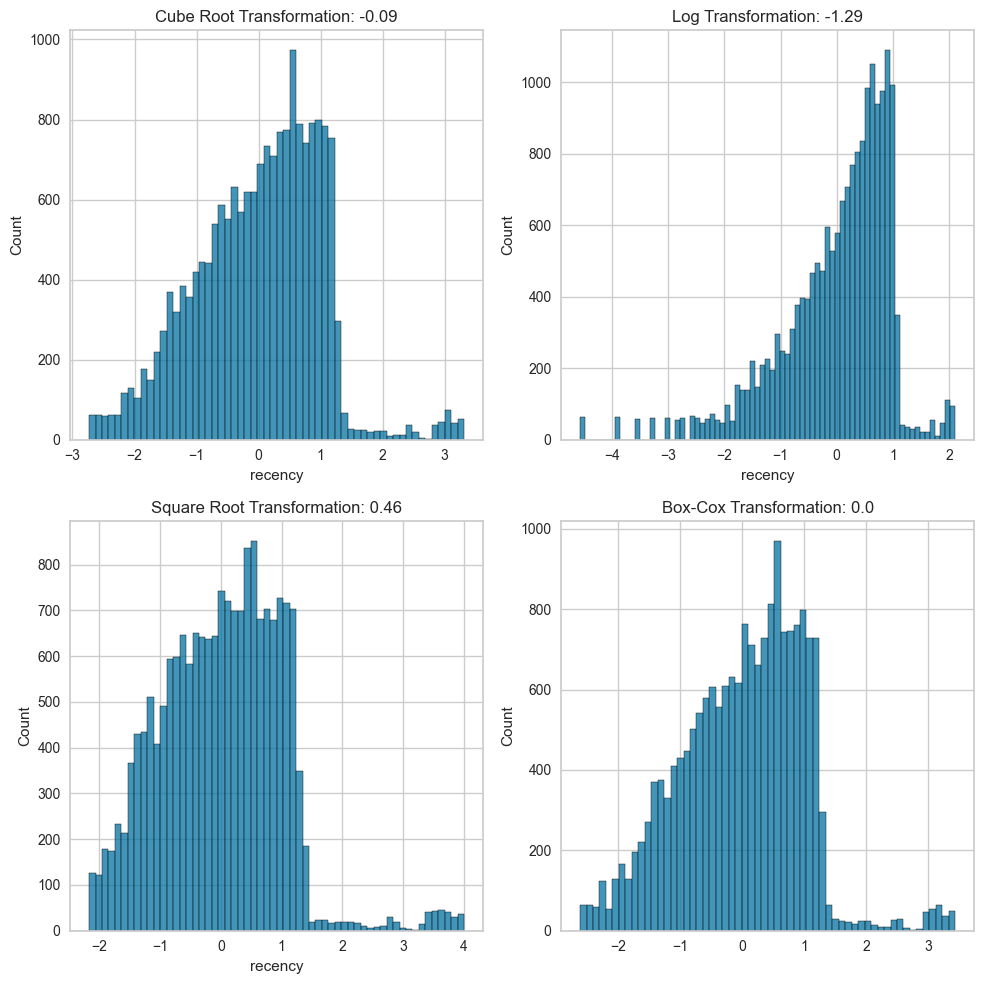

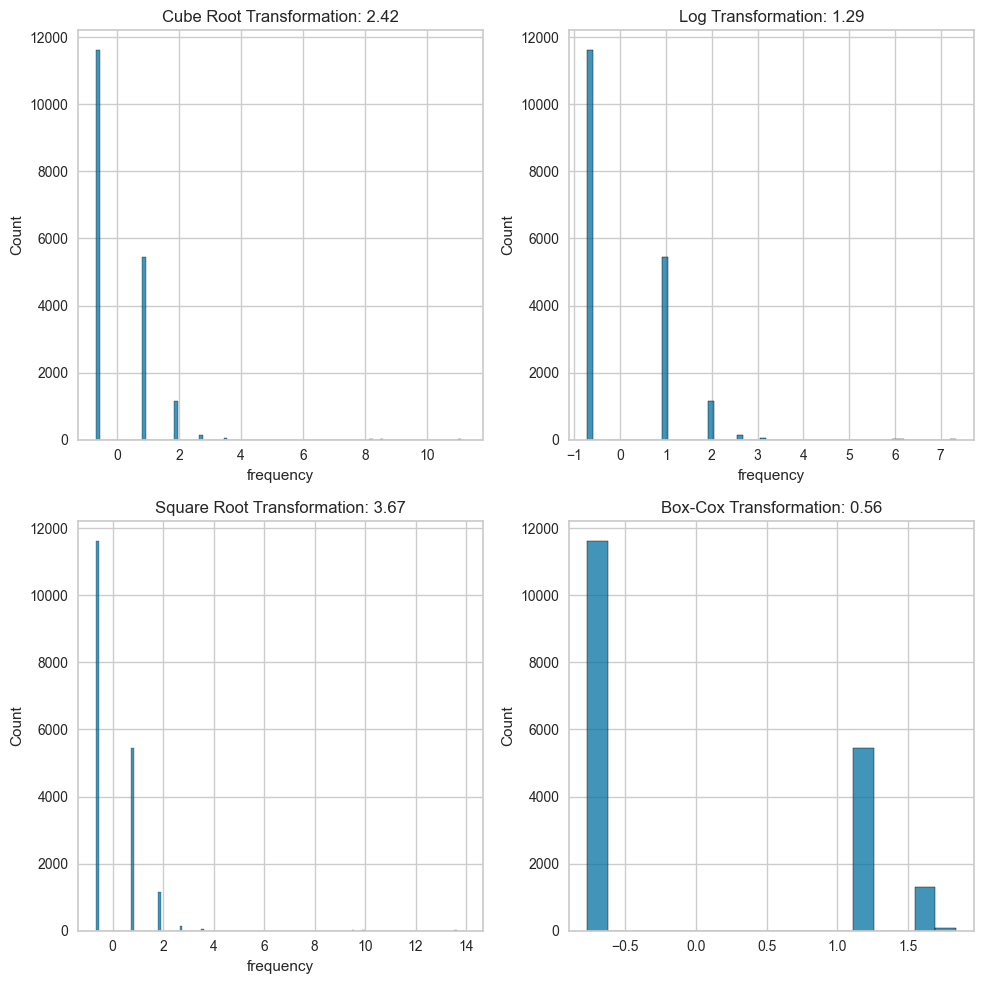

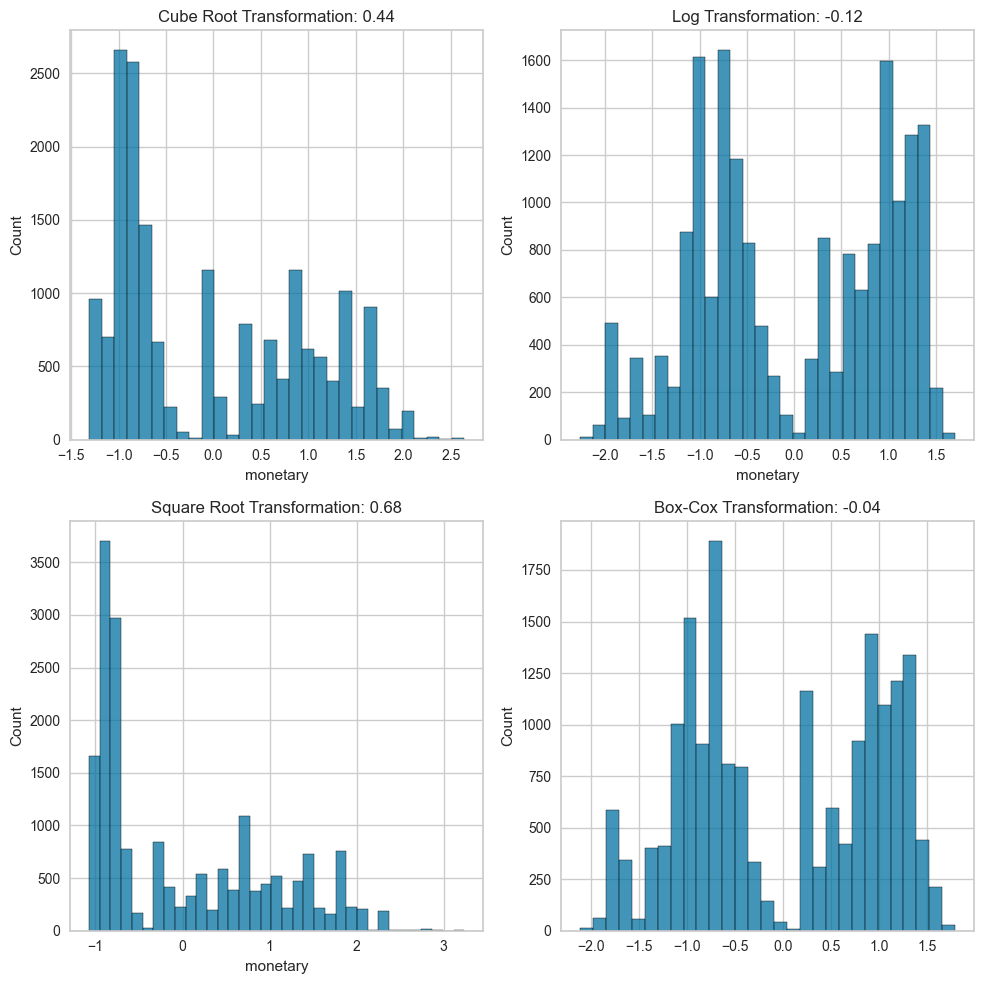

In [49]:
analyze_skewness('recency')
analyze_skewness('frequency')
analyze_skewness('monetary')

In [50]:
def analyze_skewness_G(x):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    # Cube root transformation
    data_cbrt=np.cbrt(sum_geography[x])
    sns.histplot( data_cbrt, ax=ax[0, 0])
    ax[0, 0].set_title(f'Log Transformation: {round(data_cbrt.skew(), 2)}')

    # Log transformation
    data_log=np.log(sum_geography[x])
    sns.histplot(data_log, ax=ax[0, 1])
    ax[0, 1].set_title(f'Log Transformation: {round(data_log.skew(), 2)}')

    # Square root transformation
    data_sqrt=np.sqrt(sum_geography[x])
    sns.histplot(data_sqrt, ax=ax[1, 0])
    ax[1, 0].set_title(f'Square Root Transformation: {round(data_sqrt.skew(), 2)}')
   
    # Box-Cox transformation (if possible)
    if sum_geography[x].min() > 0:  # Check if the data is positive
        transformed_data, _ = stats.boxcox(sum_geography[x])
        sns.histplot(transformed_data, ax=ax[1, 1])
        ax[1, 1].set_title(f'Box-Cox Transformation: {round(pd.Series(transformed_data).skew(), 2)}')
    else:
        ax[1, 1].set_title('Box-Cox Transformation (Not Applicable)')

    plt.tight_layout()
    plt.show()

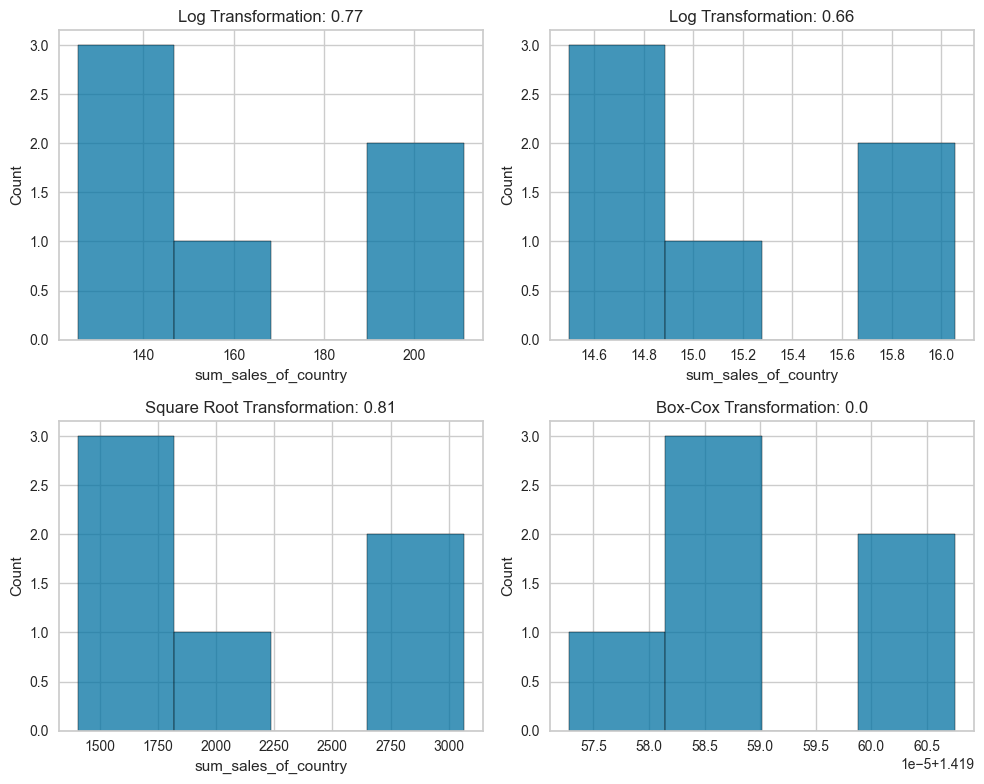

In [51]:
analyze_skewness_G('sum_sales_of_country')

In [52]:
rfm_final = pd.DataFrame()
rfm_final['recency'] = stats.boxcox(rfm['recency'])[0]
rfm_final['frequency'] = stats.boxcox(rfm['frequency'])[0]
rfm_final['monetary'] = stats.boxcox(rfm['monetary'])[0]

rfm_final

,recency,frequency,monetary
0,17.861626,0.433569,10.773099
1,7.257971,0.433569,10.412691
2,19.727012,0.433569,10.749799
3,17.655207,0.433569,10.754187
4,17.919941,0.433569,10.763996
...,...,...,...
18479,23.474497,0.000000,8.856791
18480,15.424041,0.000000,9.092583
18481,29.585055,0.000000,9.531660
18482,23.203883,0.000000,8.856791


# 6. Standardization

In [53]:
std_scaler = StandardScaler()
df = rfm_final.copy()
std_scaler.fit(df)
df_scaled = std_scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,recency,frequency,monetary
0,0.756776,1.569374,1.545695
1,-1.247763,1.569374,1.413026
2,1.109412,1.569374,1.537118
3,0.717754,1.569374,1.538733
4,0.767800,1.569374,1.542344
...,...,...,...
18479,1.817845,-0.765189,0.840287
18480,0.295969,-0.765189,0.927083
18481,2.972999,-0.765189,1.088711
18482,1.766688,-0.765189,0.840287


In [54]:
df_scaled.describe().astype(int)

,recency,frequency,monetary
count,18484,18484,18484
mean,0,0,0
std,1,1,1
min,-2,0,-2
25%,0,0,0
50%,0,0,0
75%,0,1,0
max,3,1,1


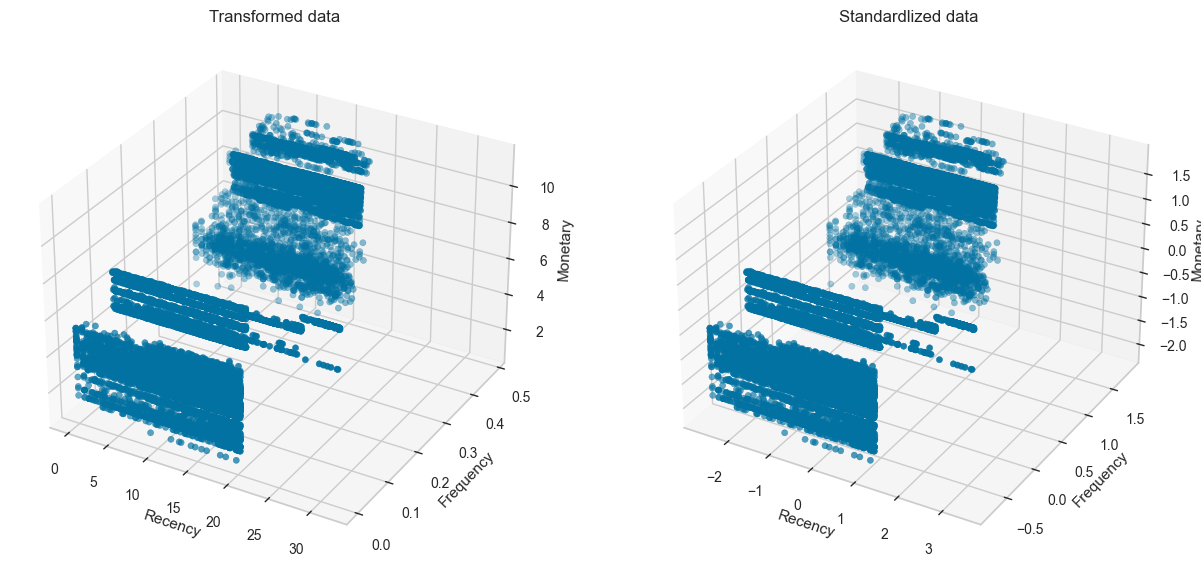

In [55]:
#Comparison
fig = plt.figure(1, [15,9])

ax = fig.add_subplot(121, projection = '3d')
ax.scatter(xs = rfm_final["recency"], ys = rfm_final["frequency"], zs= rfm_final["monetary"])
ax.set_title("Transformed data")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax = fig.add_subplot(122, projection = '3d')
ax.scatter(xs = df_scaled["recency"], ys = df_scaled["frequency"], zs= df_scaled["monetary"])
ax.set_title("Standardlized data")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()


# 7. Export data

In [56]:
# export this rfm segmentation dataset to analyze more in viz tools to analyze more, like:
# why many customer churn, or what make customer champions, etc.
cus_key = rfm[['customer_key']]
df_scaled = pd.concat([df_scaled, cus_key], axis=1)
df_scaled = df_scaled[['customer_key','recency', 'frequency', 'monetary']]
df_scaled

,customer_key,recency,frequency,monetary
0,11000,0.756776,1.569374,1.545695
1,11001,-1.247763,1.569374,1.413026
2,11002,1.109412,1.569374,1.537118
3,11003,0.717754,1.569374,1.538733
4,11004,0.767800,1.569374,1.542344
...,...,...,...,...
18479,29479,1.817845,-0.765189,0.840287
18480,29480,0.295969,-0.765189,0.927083
18481,29481,2.972999,-0.765189,1.088711
18482,29482,1.766688,-0.765189,0.840287


In [57]:
df_scaled.to_csv("rfm_data.csv", index = False)

# CHAPTER 4

# 1. Calculate RFM Score

In [58]:
#R score
rfm["r"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1],)

# F score
rfm['f'] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels= [1, 2, 3, 4, 5])

# M score
rfm["m"] = pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

# RFM Combined Score
rfm["rfm_score"] = rfm["r"].astype(str) +rfm["f"].astype(str) + rfm["m"].astype(str)

rfm

,customer_key,recency,frequency,monetary,r,f,m,rfm_score
0,11000,256,3,8248.9900,2,5,5,255
1,11001,35,3,6383.8800,5,5,5,555
2,11002,325,3,8114.0400,1,5,5,155
3,11003,249,3,8139.2900,2,5,5,255
4,11004,258,3,8196.0100,2,5,5,255
...,...,...,...,...,...,...,...,...
18479,29479,497,1,2049.0982,1,4,4,144
18480,29480,181,1,2442.0300,3,4,4,344
18481,29481,885,1,3374.9900,1,4,5,145
18482,29482,483,1,2049.0982,1,4,4,144


In [59]:
# RFM Segmentation
seg_map = {
    r'[1-2][1-5][1-3]':'Low value customers and have left the company',
    r'[1-2][1-5][4-5]':'Customer have left the company',
    r'4[1-2][1-4]': 'New customer',
    r'5[1-2][5]':'new customer',
    r'4[1-2]5':'Customers spend a lot',
    r'[3-5][1-2][3-4]':'Customers spend a lot',
    r'3[3-5][3-5]':'Customers are at risk of leaving the company',
    r'[4-5]33':'Potential long-term customers',
    r'43[4-5]':'Potential long-term customers',
    r'43[4-5]':'Potential long-term customers',
    r'443':'Potential long-term customers',
    r'53[4-5]':'Potential long-term customers',
    r'543':'Potential long-term customers',
    r'[4-5][4-5][4]':'Loyal customer',
    r'[4-5]45':'Loyal customer',
    r'455':'Loyal customer',
    r'[4-5]53':'Loyal customer',
    r'555':'Best customer ',
    r'[3-5][1-5][1-2]':'General customers'}

rfm['Segment'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm

,customer_key,recency,frequency,monetary,r,f,m,rfm_score,Segment
0,11000,256,3,8248.9900,2,5,5,255,Customer have left the company
1,11001,35,3,6383.8800,5,5,5,555,Best customer
2,11002,325,3,8114.0400,1,5,5,155,Customer have left the company
3,11003,249,3,8139.2900,2,5,5,255,Customer have left the company
4,11004,258,3,8196.0100,2,5,5,255,Customer have left the company
...,...,...,...,...,...,...,...,...,...
18479,29479,497,1,2049.0982,1,4,4,144,Customer have left the company
18480,29480,181,1,2442.0300,3,4,4,344,Customers are at risk of leaving the company
18481,29481,885,1,3374.9900,1,4,5,145,Customer have left the company
18482,29482,483,1,2049.0982,1,4,4,144,Customer have left the company


# 2. Visualization

In [60]:
# Counting customer in each segment
seg_count = rfm.Segment.value_counts()
seg_count


Segment
Low value customers and have left the company    4339
General customers                                3619
Customer have left the company                   3053
Loyal customer                                   1975
Customers are at risk of leaving the company     1600
New customer                                     1414
Customers spend a lot                            1166
Potential long-term customers                     849
Best customer                                     469
Name: count, dtype: int64

In [61]:
# Create DataFrame for visualization

seg_count = pd.DataFrame(data = seg_count)
seg_count = seg_count.reset_index()
seg_count


,Segment,count
0,Low value customers and have left the company,4339
1,General customers,3619
2,Customer have left the company,3053
3,Loyal customer,1975
4,Customers are at risk of leaving the company,1600
5,New customer,1414
6,Customers spend a lot,1166
7,Potential long-term customers,849
8,Best customer,469


In [62]:
print(seg_count.columns)

Index(['Segment', 'count'], dtype='object')


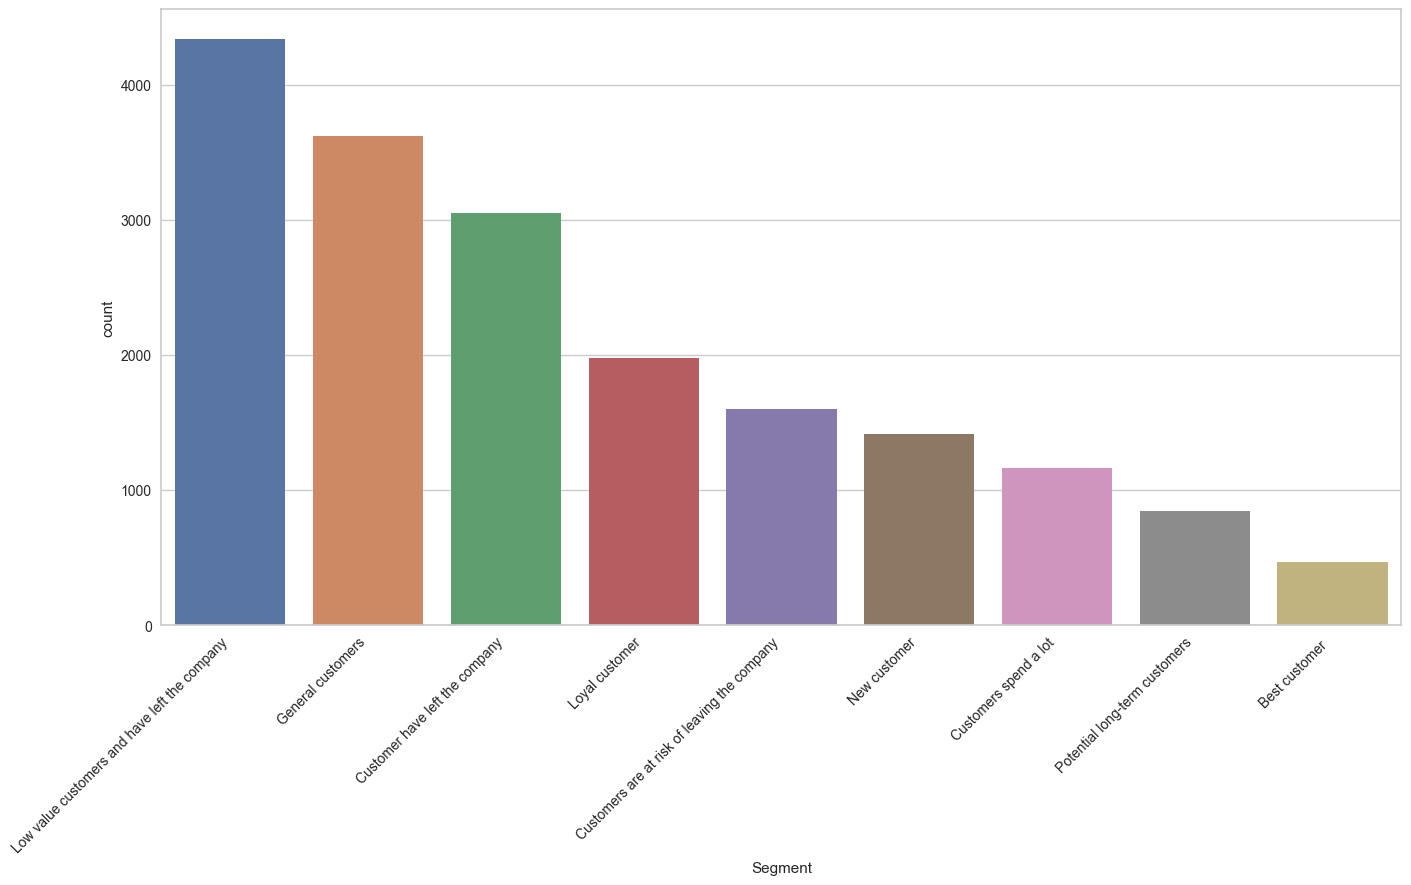

In [63]:
# Convert the data type of column 'count' to number
seg_count['count'] = pd.to_numeric(seg_count['count'])

# Bar chart
palette_color = 'deep'
plt.figure(figsize=(16, 8))
sns.barplot(x='Segment', y='count', data=seg_count, hue='Segment', palette=palette_color, legend=False)
plt.xticks(rotation=45, ha="right")

plt.show()

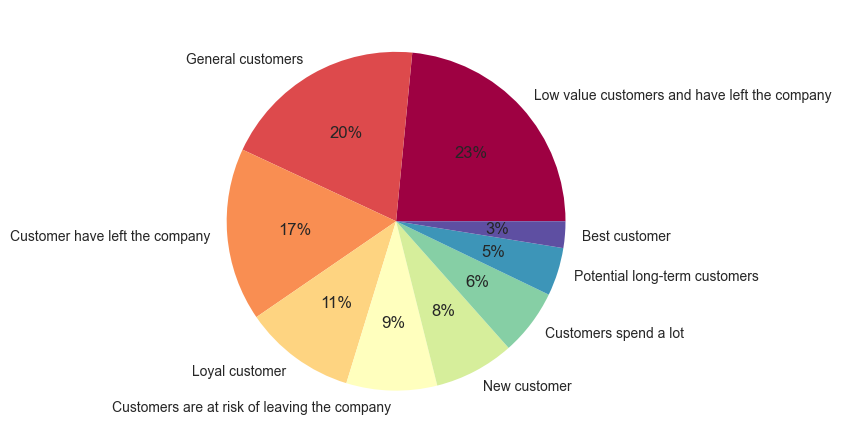

In [64]:
# Pie Chart
colors = plt.cm.Spectral(np.linspace(0, 1, len(seg_count.Segment)))

plt.pie(seg_count['count'], labels=seg_count['Segment'], autopct='%.0f%%', colors=colors)
plt.show()

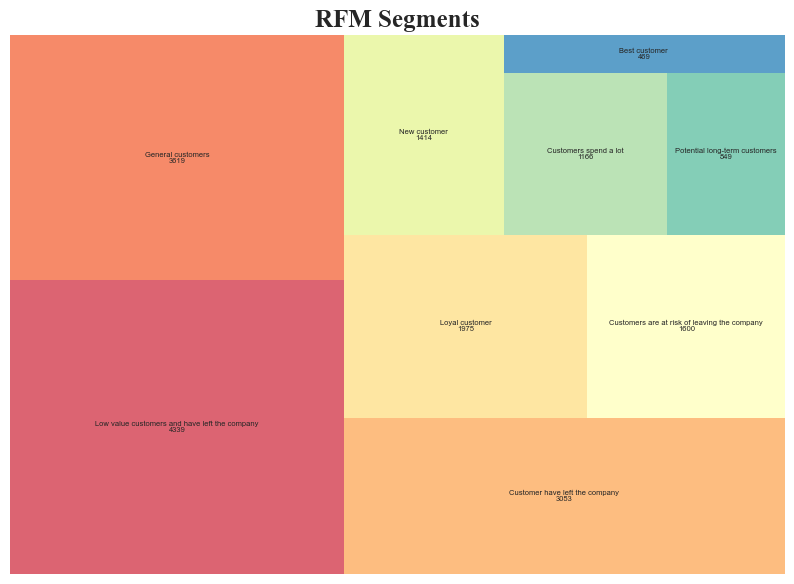

In [65]:
sizes = seg_count['count'].tolist()

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 7)

text_kwargs = {'fontsize': 5.5
               , 'fontfamily': 'sans-serif', 'wrap': True}

squarify.plot(
    sizes=sizes,
    label=seg_count['Segment'],
    value=seg_count['count'],
    alpha=0.8,
    text_kwargs=text_kwargs,
    color=sns.color_palette("Spectral", len(seg_count.index))
)

plt.title("RFM Segments", fontsize=18, fontweight="bold", fontfamily='Times New Roman')
plt.axis('off')
plt.show()

# 3. Elbow, Silhouette, K-Means

In [79]:
df_scaled = df_scaled[['recency','frequency', 'monetary']].copy()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

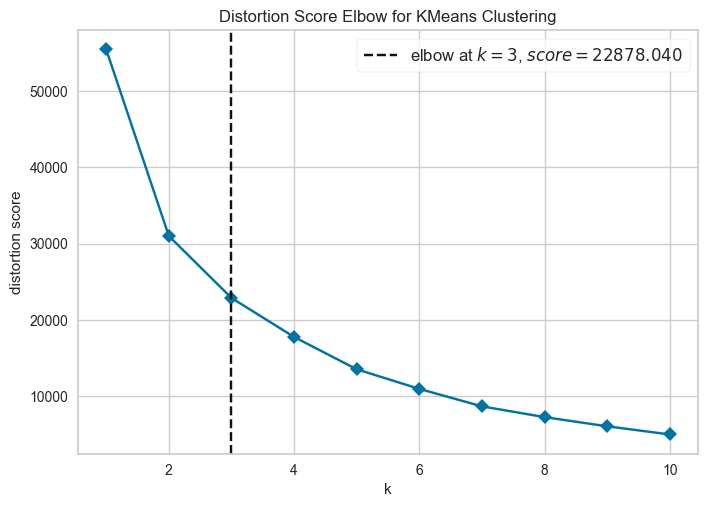

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,11), timings= False)
visualize.fit(df_scaled)        
visualize.show() 

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, the silhouette score is 0.4503142366805815


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, the silhouette score is 0.3961971854133582


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, the silhouette score is 0.42047729540494744


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, the silhouette score is 0.45303464624749884


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the silhouette score is 0.4757077939178181


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, the silhouette score is 0.47277323878089406


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.47989945082766367


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=9, the silhouette score is 0.49193391074271786


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=10, the silhouette score is 0.47800262626214085


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14816\1217041034.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_n_clusters,silhouette_avg,'bx-', color='blue')


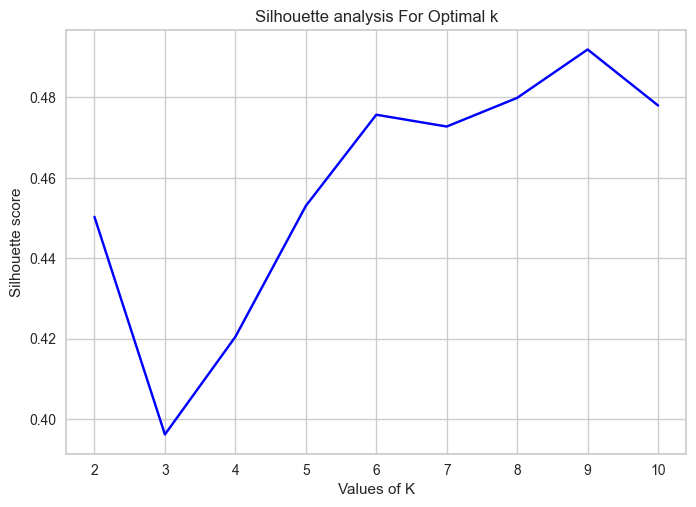

In [81]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_avg.append(score)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, score))
plt.plot(range_n_clusters,silhouette_avg,'bx-', color='blue')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

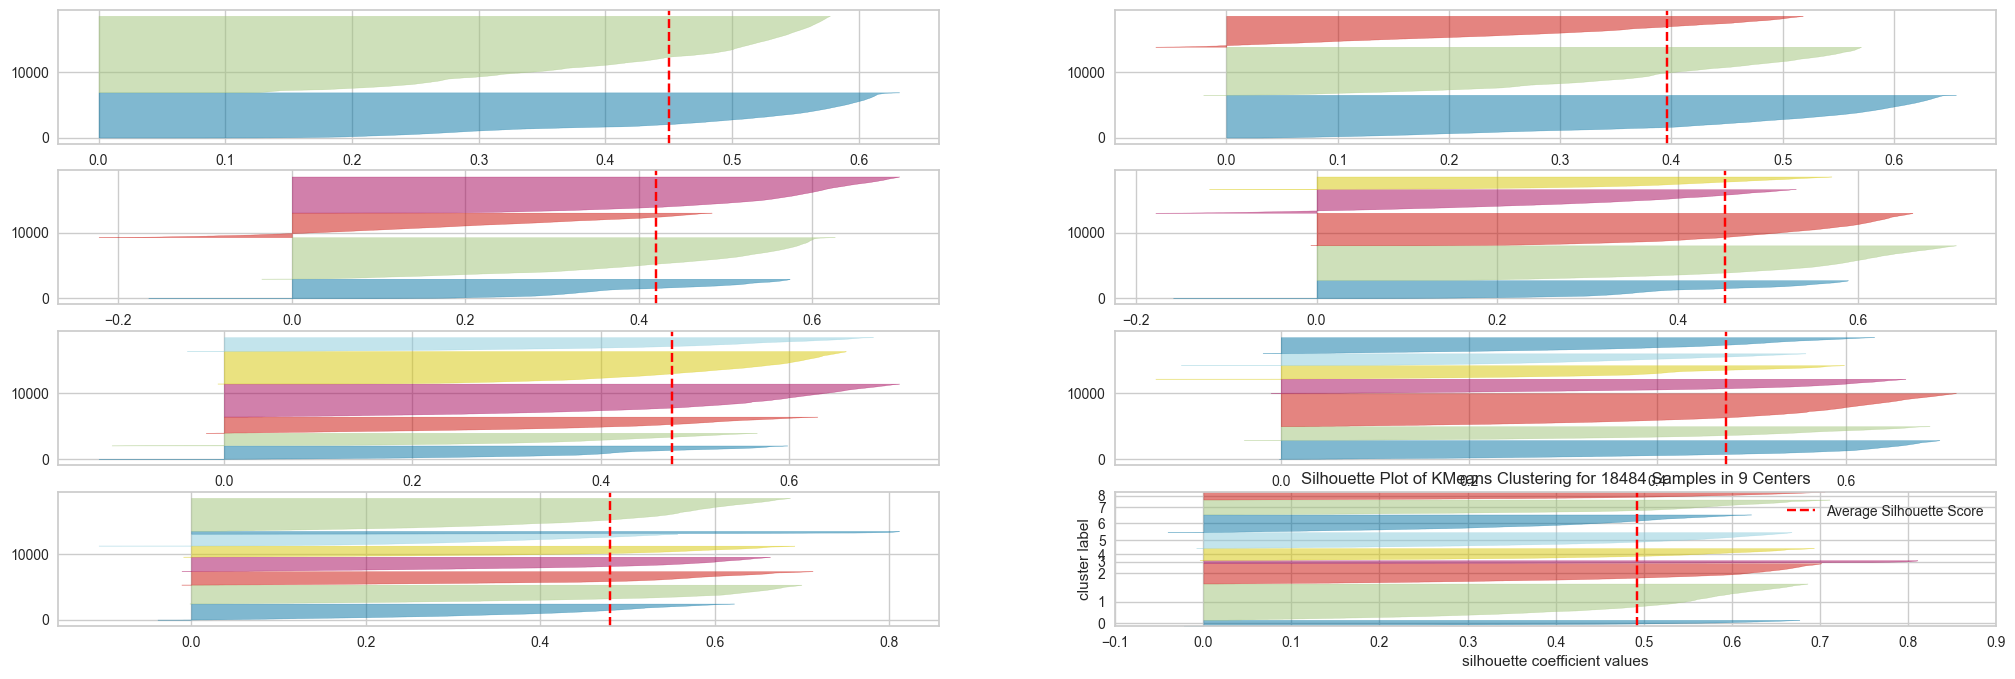

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18484 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
#silhouette
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(25,8))
for k in [2, 3, 4, 5, 6, 7, 8, 9]:

    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

visualizer.show()

In [83]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,recency,frequency,monetary
0,-0.010042,1.287770,1.189463
1,0.508975,-0.765189,-1.022809
2,0.948216,-0.765189,0.639474
3,-1.091081,-0.765189,-0.362204
4,-0.698854,1.313855,-0.480966


In [84]:
df_new = rfm.assign(cluster = cluster_labels)
df_new.head()


,customer_key,recency,frequency,monetary,r,f,m,rfm_score,Segment,cluster
0,11000,256,3,8248.99,2,5,5,255,Customer have left the company,0
1,11001,35,3,6383.88,5,5,5,555,Best customer,0
2,11002,325,3,8114.04,1,5,5,155,Customer have left the company,0
3,11003,249,3,8139.29,2,5,5,255,Customer have left the company,0
4,11004,258,3,8196.01,2,5,5,255,Customer have left the company,0


In [85]:
df_result = df_new.groupby(['cluster']).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'count']
    }).round(2)
df_result

recency frequency monetary      
           mean      mean     mean count
cluster                                 
0        160.77      2.22  4503.39  4942
1        222.33      1.00    48.00  5292
2        330.50      1.00  1626.55  2748
3         51.18      1.00   565.57  3579
4         95.97      2.64   184.59  1923

<Axes: xlabel='cluster', ylabel='monetary'>

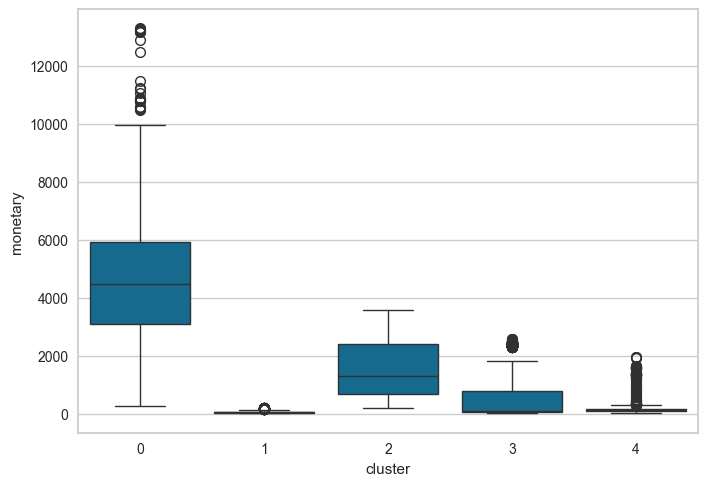

In [86]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='cluster', y='monetary', data=df_new)

<Axes: xlabel='cluster', ylabel='frequency'>

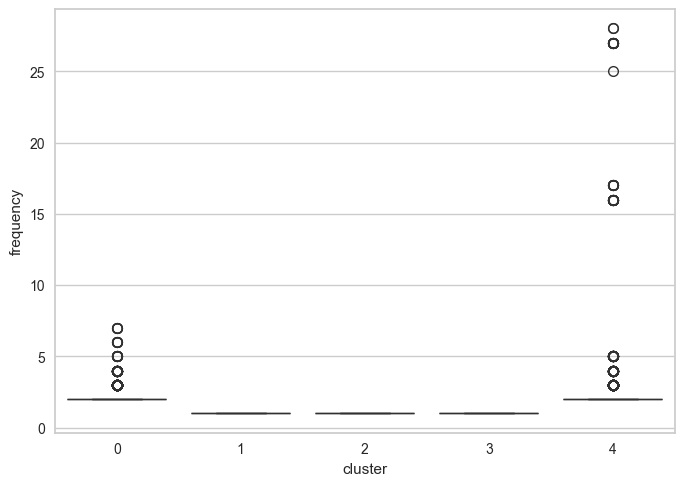

In [87]:
# Box plot to visualize cluster Id vs frequency

sns.boxplot(x='cluster', y='frequency', data=df_new)

<Axes: xlabel='cluster', ylabel='recency'>

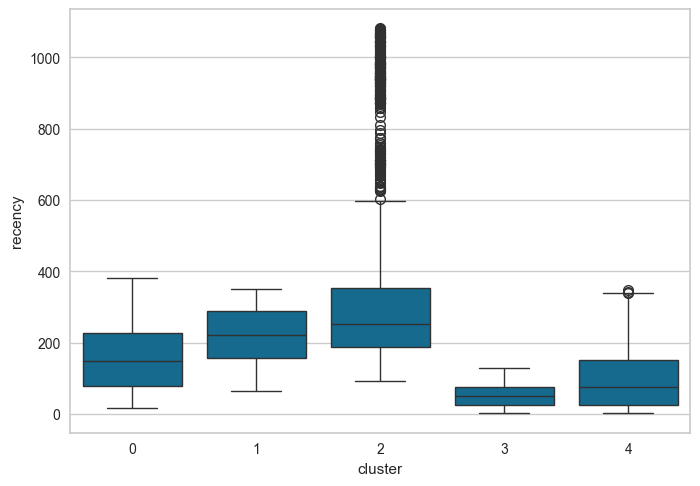

In [88]:
# Box plot to visualize cluster Id vs recency

sns.boxplot(x='cluster', y='recency', data=df_new)

# 4. Calculate CLV

In [89]:
data_CLV=df_result.copy()
data_CLV

recency frequency monetary      
           mean      mean     mean count
cluster                                 
0        160.77      2.22  4503.39  4942
1        222.33      1.00    48.00  5292
2        330.50      1.00  1626.55  2748
3         51.18      1.00   565.57  3579
4         95.97      2.64   184.59  1923

In [90]:
weight_RFM = {
    'WR': 0.7306,
    'WF': 0.1884,
    'WM': 0.0809
}

In [78]:
data_CLV['CLV'] =None
test0= -data_CLV.loc[0, ('recency', 'mean')]*weight_RFM['WR']+ data_CLV.loc[0, ('frequency', 'mean')]*weight_RFM['WF']+data_CLV.loc[0, ('monetary', 'mean')]*weight_RFM['WM']
test1= -data_CLV.loc[1, ('recency', 'mean')]*weight_RFM['WR']+ data_CLV.loc[1, ('frequency', 'mean')]*weight_RFM['WF']+data_CLV.loc[1, ('monetary', 'mean')]*weight_RFM['WM']
test2= -data_CLV.loc[2, ('recency', 'mean')]*weight_RFM['WR']+ data_CLV.loc[2, ('frequency', 'mean')]*weight_RFM['WF']+data_CLV.loc[2, ('monetary', 'mean')]*weight_RFM['WM']
test3= -data_CLV.loc[3, ('recency', 'mean')]*weight_RFM['WR']+ data_CLV.loc[3, ('frequency', 'mean')]*weight_RFM['WF']+data_CLV.loc[3, ('monetary', 'mean')]*weight_RFM['WM']
test4= -data_CLV.loc[4, ('recency', 'mean')]*weight_RFM['WR']+ data_CLV.loc[4, ('frequency', 'mean')]*weight_RFM['WF']+data_CLV.loc[4, ('monetary', 'mean')]*weight_RFM['WM']
data_CLV.loc[0, 'CLV'] = test0
data_CLV.loc[1, 'CLV'] = test1
data_CLV.loc[2, 'CLV'] = test2
data_CLV.loc[3, 'CLV'] = test3
data_CLV.loc[4, 'CLV'] = test4
data_CLV

recency frequency monetary               CLV
           mean      mean     mean count            
cluster                                             
0        176.59      1.14   977.11  3679  -49.753679
1        144.95      1.61  1758.86  3726   36.694628
2        150.60      2.25  2656.12  3721  105.275648
3        166.21      1.29  1273.65  3715  -18.151705
4        241.40      1.18  1261.42  3643   -74.09565